<a href="https://colab.research.google.com/github/ayarii/learner-engagement/blob/main/A_CNN_Approach_for_Automatic_Engagement_Detection_in_Educational_Context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [30]:

#Import dataset
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/ayarii/learner-engagement/blob/main/Student-engagement-dataset.zip?raw=true",
    extract=False)
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
data_dir = pathlib.Path('/content/datasets/Student-engagement-dataset')
print(data_dir)
print(os.path.abspath(data_dir))



/content/datasets/Student-engagement-dataset
/content/datasets/Student-engagement-dataset


Populating the interactive namespace from numpy and matplotlib
Shape of the image (72307,)


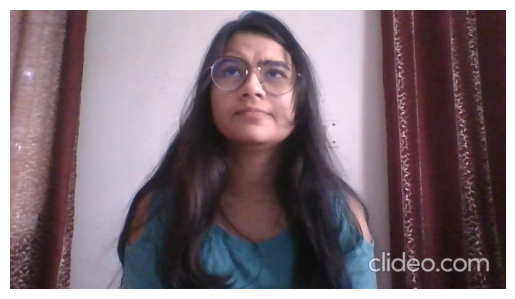

Shape of the image (19745,)


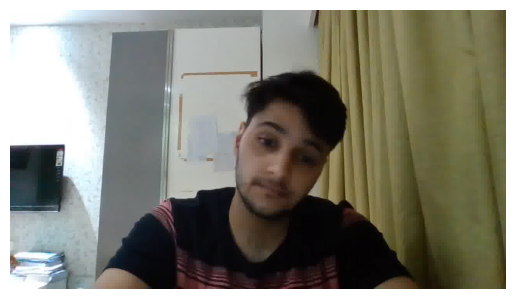

Shape of the image (21216,)


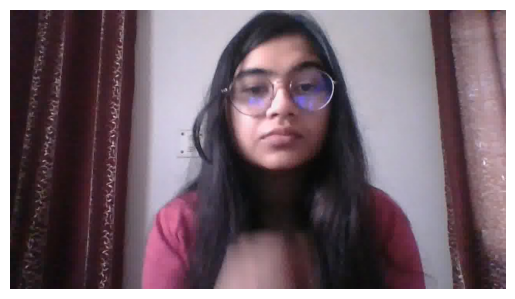

Shape of the image (21813,)


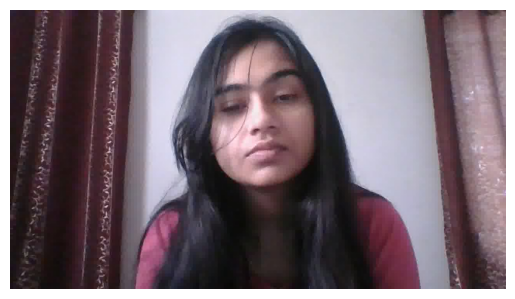

Shape of the image (17353,)


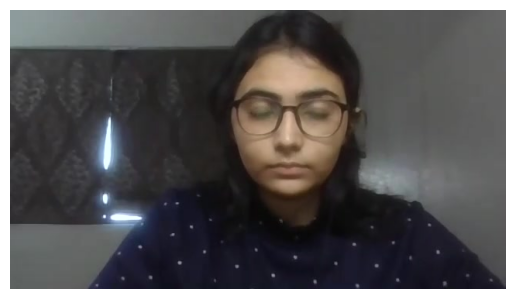

Shape of the image (44759,)


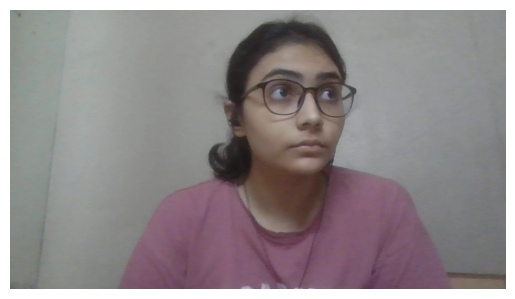

In [31]:

%pylab inline
#learner confused
url_confused = r'https://github.com/ayarii/learner-engagement/blob/main/0020.jpg?raw=true'
resp = requests.get(url_confused, stream=True).raw
image_array_confused = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_confused.shape}')
image_confused = cv2.imdecode(image_array_confused, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_confused, cv2.COLOR_BGR2RGB))
plt.show()

#learner frustrated
url_frustrated = r'https://github.com/ayarii/learner-engagement/blob/main/135.jpg?raw=true'
resp = requests.get(url_frustrated, stream=True).raw
image_array_frustrated= np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_frustrated.shape}')
image_frustrated = cv2.imdecode(image_array_frustrated, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_frustrated, cv2.COLOR_BGR2RGB))
plt.show()

#learner engaged
url_engaged = r'https://github.com/ayarii/learner-engagement/blob/main/0076.jpg?raw=true'
resp = requests.get(url_engaged, stream=True).raw
image_array_engagement = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_engagement.shape}')
image_engagement = cv2.imdecode(image_array_engagement, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
plt.show()

#learner bored
url_bored = r'https://github.com/ayarii/learner-engagement/blob/main/0153.jpg?raw=true'
resp = requests.get(url_bored, stream=True).raw
image_array_bored = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_bored.shape}')
image_bored = cv2.imdecode(image_array_bored, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_bored, cv2.COLOR_BGR2RGB))
plt.show()

#learner drowsy
url_drowsy = r'https://github.com/ayarii/learner-engagement/blob/main/0021.jpg?raw=true'
resp = requests.get(url_drowsy, stream=True).raw
image_array_drowsy = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_drowsy.shape}')
image_drowsy = cv2.imdecode(image_array_drowsy, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_drowsy, cv2.COLOR_BGR2RGB))
plt.show()

# learner looking_away
url_looking_away = r'https://github.com/ayarii/learner-engagement/blob/main/0011.jpg?raw=true'
resp = requests.get(url_looking_away, stream=True).raw
image_array_looking_away = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_looking_away.shape}')
image_looking_away = cv2.imdecode(image_array_looking_away, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_looking_away, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:

#Train CNN using data-augmentation
# Create an instance of the ImageDataGenerator for data augmentation
batch_size = 32
img_height = 200
img_width = 200
# Create an ImageDataGenerator for data augmentation
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
 #   shear_range=0.2,
 #   zoom_range=0.2,
 #  horizontal_flip=True,
  #{}  validation_split=0.2  # Split data into training and validation
#)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  # Add rotation augmentation
    width_shift_range=0.2,  # Add width shift augmentation
    height_shift_range=0.2,  # Add height shift augmentation
    validation_split=0.2
)



# Generate training dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical',  # Assuming you have categorical labels
    subset='training'  # Specify the subset as training
)

# Generate validation dataset
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical',
    subset='validation'  # Specify the subset as validation
)

# Verify the class indices
print(train_generator.class_indices)
print(train_generator)

Found 1699 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}


Number of augmented samples: 54
Class 0: 339 samples
Class 1: 287 samples
Class 2: 296 samples
Class 3: 211 samples
Class 4: 278 samples
Class 5: 288 samples
Number of original samples: 1699
Batch size during training: 32
Number of augmented samples per epoch: 54368
Number of epochs: 100
Total number of augmented samples: 5436800


<ipython-input-33-7f71695e6234>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count = sum(1 for label in class_distribution if label == class_label)


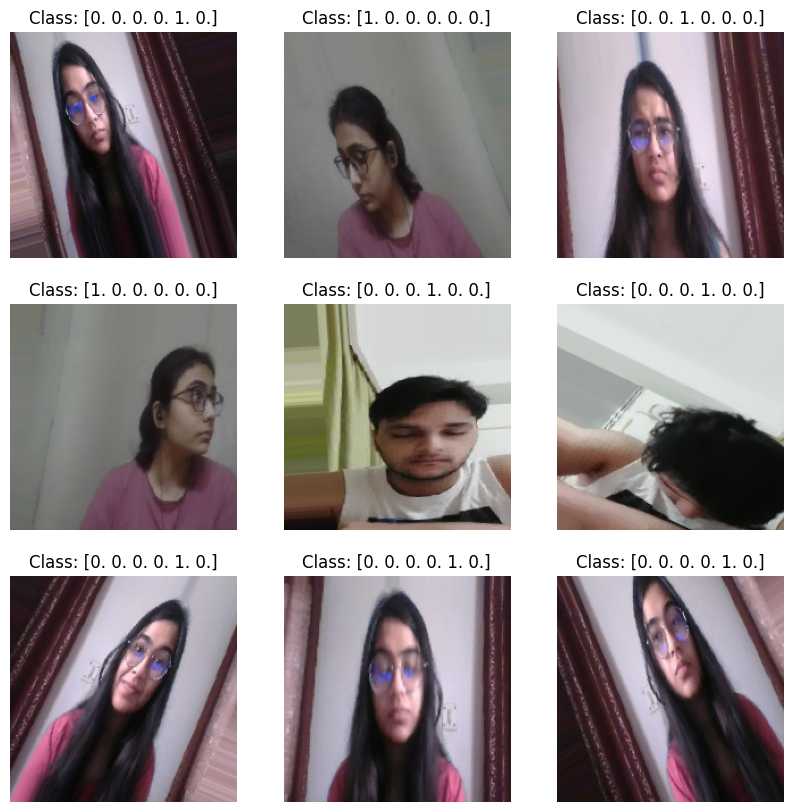

In [33]:

#The number of samples in your dataset after applying data augmentation.
num_original_samples = len(train_generator.filenames)  # Number of original samples in your dataset
batch_size = train_generator.batch_size  # Batch size used during training
num_augmented_samples_per_epoch = num_original_samples * batch_size
num_epochs = 100  # Replace with the actual number of epochs
total_augmented_samples = num_epochs * num_augmented_samples_per_epoch

# Number of Samples:
num_samples = len(train_generator)
print("Number of augmented samples:", num_samples)

#Class Distribution:
class_distribution = train_generator.classes
unique_classes = set(class_distribution)

for class_label in unique_classes:
    count = sum(1 for label in class_distribution if label == class_label)
    print(f"Class {class_label}: {count} samples")

# Print the results
print("Number of original samples:", num_original_samples)
print("Batch size during training:", batch_size)
print("Number of augmented samples per epoch:", num_augmented_samples_per_epoch)
print("Number of epochs:", num_epochs)
print("Total number of augmented samples:", total_augmented_samples)


#Visual Inspection:
import matplotlib.pyplot as plt

# Display a few augmented images
images, labels = train_generator.next()

plt.figure(figsize=(10, 10))
for i in range(min(9, batch_size)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis("off")

plt.show()

In [34]:

#create the model
num_classes = 6
img_size = (200, 200,3)
#model = tf.keras.Sequential([
 #   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200, 200, 3)),
 #   layers.Conv2D(32, 3, activation='relu'),
 #   layers.MaxPooling2D(),
  #  layers.Conv2D(32, 3, activation='relu'),
   # layers.MaxPooling2D(),
   # layers.Conv2D(32, 3, activation='relu'),
   # layers.MaxPooling2D(),
   # layers.Flatten(),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(num_classes, activation='softmax')
#])
#model.summary()


model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200, 200, 3)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Add another dropout layer
    layers.Dense(num_classes, activation='softmax')
])


In [35]:

# Set up callbacks
log_dir = "logs/"
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:

# Compile your model

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])



In [37]:

# Train your model using the augmented dataset
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=500,
    callbacks=[tensorboard_callback, early_stopping])

Epoch 1/500
54/54 [==============================] - 43s 753ms/step - loss: 1.7896 - accuracy: 0.1948 - val_loss: 1.7841 - val_accuracy: 0.1734
Epoch 2/500
54/54 [==============================] - 38s 716ms/step - loss: 1.7889 - accuracy: 0.1666 - val_loss: 1.7845 - val_accuracy: 0.1710
Epoch 3/500
54/54 [==============================] - 38s 704ms/step - loss: 1.7874 - accuracy: 0.1954 - val_loss: 1.7853 - val_accuracy: 0.1995
Epoch 4/500
54/54 [==============================] - 38s 714ms/step - loss: 1.7837 - accuracy: 0.2007 - val_loss: 1.7827 - val_accuracy: 0.1995
Epoch 5/500
54/54 [==============================] - 38s 707ms/step - loss: 1.7860 - accuracy: 0.1972 - val_loss: 1.7830 - val_accuracy: 0.1995
Epoch 6/500
54/54 [==============================] - 38s 712ms/step - loss: 1.7852 - accuracy: 0.1995 - val_loss: 1.7830 - val_accuracy: 0.1995
Epoch 7/500
54/54 [==============================] - 38s 714ms/step - loss: 1.7828 - accuracy: 0.1972 - val_loss: 1.7829 - val_accuracy:

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator, verbose=0)
print(f'vall loss: {loss:.4f}')
print(f'vall accuracy: {accuracy:.4f}')

vall loss: 1.7824
vall accuracy: 0.1995


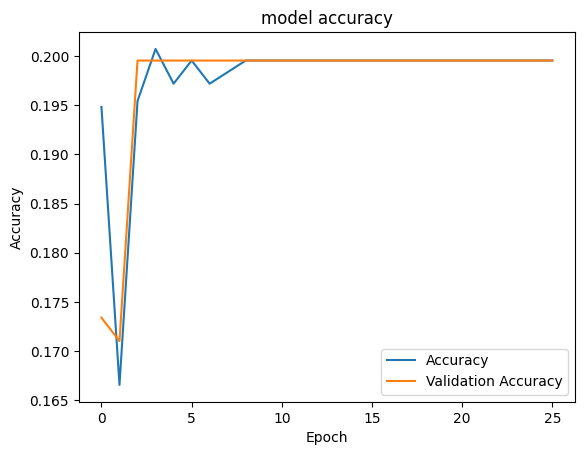

In [39]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

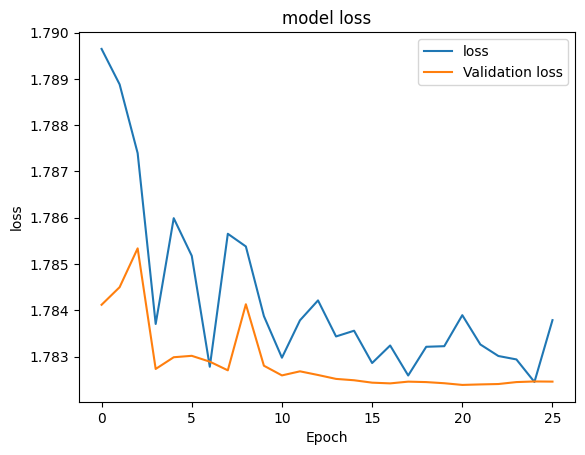

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation loss"])
plt.show()